In [1]:
import torch
import sklearn
from torch import nn


# 1. Make classification data

In [2]:
from sklearn.datasets import make_circles

n_sample = 1000
X, y = make_circles(
    n_samples=n_sample, 
    noise=0.03, 
    random_state=42)

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f"First 5 samples of X : \n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X : 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [5]:
# Make Dataframe of circle data

import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


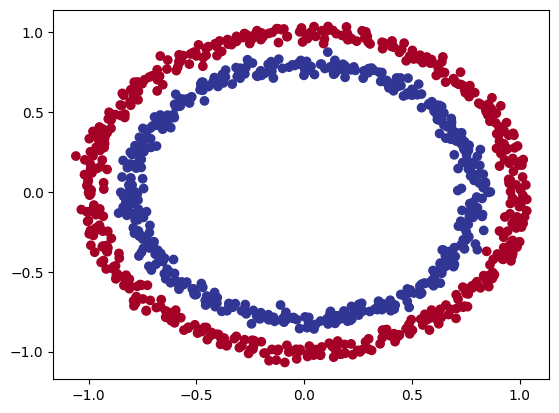

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes of one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes of one sample of X: (2,) and the same for y: ()


# 1.2 Turn data into tensors and create trand and test split

In [9]:
X.dtype

dtype('float64')

In [10]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [13]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)
    def forward(self, x):
        return self.layer_1(self.layer_2(x))

model_0 = CircleModelV0()
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [14]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
)

In [15]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5098,  0.4219],
                      [ 0.5070,  0.2424],
                      [-0.3597,  0.1488],
                      [-0.0358, -0.4061],
                      [ 0.6009, -0.3738]])),
             ('0.bias', tensor([-0.4990, -0.3349, -0.6538, -0.2202, -0.3143])),
             ('1.weight',
              tensor([[ 0.0841,  0.1734, -0.3314, -0.1140, -0.1142]])),
             ('1.bias', tensor([-0.1128]))])

In [17]:
untrained_preds = model_0(X_test)

In [18]:
untrained_preds[:10]

tensor([[ 0.0753],
        [ 0.1803],
        [-0.1023],
        [ 0.1253],
        [ 0.0523],
        [ 0.1152],
        [ 0.2881],
        [ 0.2733],
        [-0.1086],
        [ 0.1890]], grad_fn=<SliceBackward0>)

In [19]:
loss_fn = nn.BCEWithLogitsLoss() # Sigmoid Activation function Build in

In [20]:
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [21]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5098,  0.4219],
                      [ 0.5070,  0.2424],
                      [-0.3597,  0.1488],
                      [-0.0358, -0.4061],
                      [ 0.6009, -0.3738]])),
             ('0.bias', tensor([-0.4990, -0.3349, -0.6538, -0.2202, -0.3143])),
             ('1.weight',
              tensor([[ 0.0841,  0.1734, -0.3314, -0.1140, -0.1142]])),
             ('1.bias', tensor([-0.1128]))])

In [22]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    accuracy = (correct / len(y_pred))*100
    return accuracy

In [23]:
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test)[:5]
y_logits

tensor([[ 0.0753],
        [ 0.1803],
        [-0.1023],
        [ 0.1253],
        [ 0.0523]])

In [24]:
y_pred_props = torch.sigmoid(y_logits)
y_pred_props

tensor([[0.5188],
        [0.5449],
        [0.4744],
        [0.5313],
        [0.5131]])

In [25]:
y_preds = torch.round(y_pred_props)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test)[:5]))

print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 0., 1., 1.])

In [26]:
torch.manual_seed(42)

epochs = 100

for epoch in range(epochs):
    model_0.train()

    y_logits = model_0(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)

    acc = accuracy_fn(y_true=y_train, y_pred=y_preds)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)

        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | Loss: {loss: .5f}%, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}% | Test Accuracy: {test_acc:.2f}%")


Epoch: 0 | Loss:  0.69501%, Acc: 53.00% | Test loss: 0.70070% | Test Accuracy: 46.50%
Epoch: 10 | Loss:  0.69450%, Acc: 51.62% | Test loss: 0.69989% | Test Accuracy: 47.50%
Epoch: 20 | Loss:  0.69417%, Acc: 51.50% | Test loss: 0.69926% | Test Accuracy: 47.50%
Epoch: 30 | Loss:  0.69394%, Acc: 51.12% | Test loss: 0.69875% | Test Accuracy: 47.00%
Epoch: 40 | Loss:  0.69376%, Acc: 51.00% | Test loss: 0.69831% | Test Accuracy: 46.50%
Epoch: 50 | Loss:  0.69362%, Acc: 50.75% | Test loss: 0.69793% | Test Accuracy: 46.50%
Epoch: 60 | Loss:  0.69350%, Acc: 51.12% | Test loss: 0.69760% | Test Accuracy: 47.50%
Epoch: 70 | Loss:  0.69341%, Acc: 51.25% | Test loss: 0.69731% | Test Accuracy: 47.50%
Epoch: 80 | Loss:  0.69333%, Acc: 51.25% | Test loss: 0.69705% | Test Accuracy: 47.50%
Epoch: 90 | Loss:  0.69327%, Acc: 51.00% | Test loss: 0.69683% | Test Accuracy: 47.00%


In [27]:
import requests
from pathlib import Path

if Path("helper_function.py").is_file():
    print("helper_function.py already exists, skipping donwload")
else:
    print("Download helper_function.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/af6548e52663c8395fe2777bd0fbfd6ac85fd6f8/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

Download helper_function.py


In [28]:
from helper_functions import plot_predictions, plot_decision_boundary

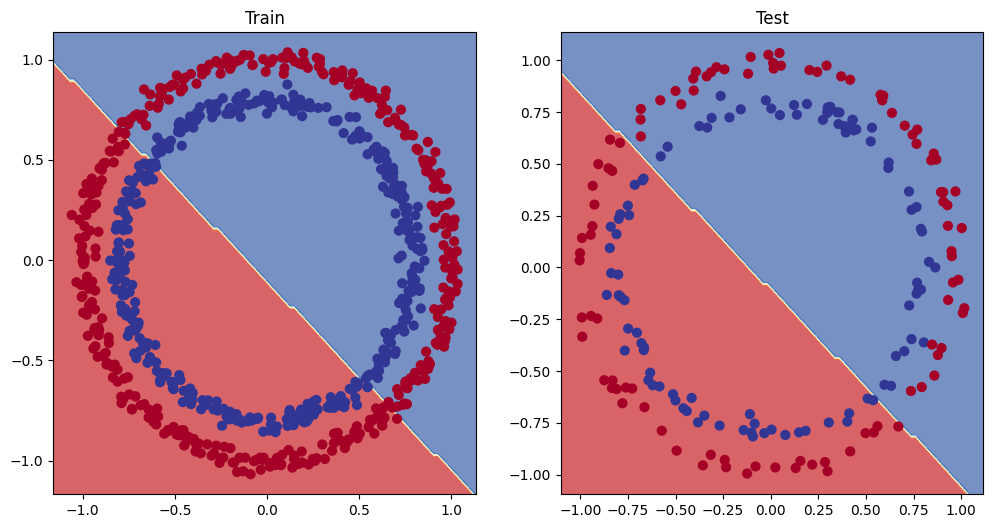

In [29]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

In [30]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x)))

In [31]:
model_1 = CircleModelV1()
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [32]:
loss_fn = nn.BCEWithLogitsLoss() # Sigmoid Activation function Build in
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [33]:
torch.manual_seed(42)

epochs = 1000

for epoch in range(epochs):
    model_1.train()

    y_logits = model_1(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)

    acc = accuracy_fn(y_true=y_train, y_pred=y_preds)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)

        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Loss: {loss: .5f}%, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}% | Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss:  0.69396%, Acc: 50.88% | Test loss: 0.69261% | Test Accuracy: 51.00%
Epoch: 100 | Loss:  0.69305%, Acc: 50.38% | Test loss: 0.69379% | Test Accuracy: 48.00%
Epoch: 200 | Loss:  0.69299%, Acc: 51.12% | Test loss: 0.69437% | Test Accuracy: 46.00%
Epoch: 300 | Loss:  0.69298%, Acc: 51.62% | Test loss: 0.69458% | Test Accuracy: 45.00%
Epoch: 400 | Loss:  0.69298%, Acc: 51.12% | Test loss: 0.69465% | Test Accuracy: 46.00%
Epoch: 500 | Loss:  0.69298%, Acc: 51.00% | Test loss: 0.69467% | Test Accuracy: 46.00%
Epoch: 600 | Loss:  0.69298%, Acc: 51.00% | Test loss: 0.69468% | Test Accuracy: 46.00%
Epoch: 700 | Loss:  0.69298%, Acc: 51.00% | Test loss: 0.69468% | Test Accuracy: 46.00%
Epoch: 800 | Loss:  0.69298%, Acc: 51.00% | Test loss: 0.69468% | Test Accuracy: 46.00%
Epoch: 900 | Loss:  0.69298%, Acc: 51.00% | Test loss: 0.69468% | Test Accuracy: 46.00%


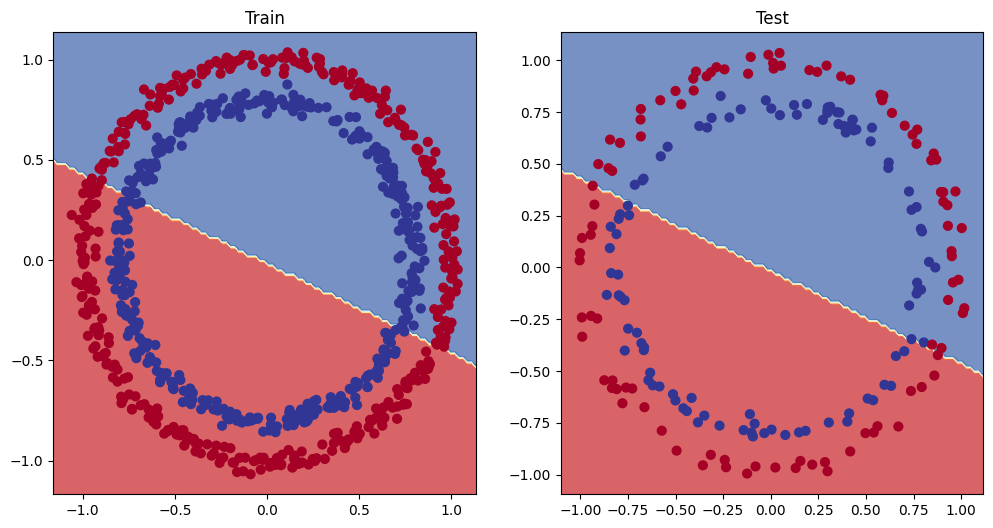

In [34]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)

In [35]:
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.reul = nn.ReLU()
    
    def forward(self, x):
        return self.layer_3(self.reul(self.layer_2(self.reul(self.layer_1(x)))))

In [36]:
model_2 = CircleModelV2()
model_2

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (reul): ReLU()
)

In [37]:
loss_fn = nn.BCEWithLogitsLoss() # Sigmoid Activation function Build in
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [38]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

for epoch in range(epochs):
    model_2.train()

    y_logits = model_2(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)

    acc = accuracy_fn(y_true=y_train, y_pred=y_preds)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_2.eval()
    with torch.inference_mode():
        test_logits = model_2(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)

        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Loss: {loss: .5f}%, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}% | Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss:  0.69295%, Acc: 50.00% | Test loss: 0.69319% | Test Accuracy: 50.00%
Epoch: 100 | Loss:  0.69115%, Acc: 52.88% | Test loss: 0.69102% | Test Accuracy: 52.50%
Epoch: 200 | Loss:  0.68977%, Acc: 53.37% | Test loss: 0.68940% | Test Accuracy: 55.00%
Epoch: 300 | Loss:  0.68795%, Acc: 53.00% | Test loss: 0.68723% | Test Accuracy: 56.00%
Epoch: 400 | Loss:  0.68517%, Acc: 52.75% | Test loss: 0.68411% | Test Accuracy: 56.50%
Epoch: 500 | Loss:  0.68102%, Acc: 52.75% | Test loss: 0.67941% | Test Accuracy: 56.50%
Epoch: 600 | Loss:  0.67515%, Acc: 54.50% | Test loss: 0.67285% | Test Accuracy: 56.00%
Epoch: 700 | Loss:  0.66659%, Acc: 58.38% | Test loss: 0.66322% | Test Accuracy: 59.00%
Epoch: 800 | Loss:  0.65160%, Acc: 64.00% | Test loss: 0.64757% | Test Accuracy: 67.50%
Epoch: 900 | Loss:  0.62362%, Acc: 74.00% | Test loss: 0.62145% | Test Accuracy: 79.00%


In [39]:
model_2.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_2(X_test))).squeeze()
y_preds[:10], y[:10] 

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

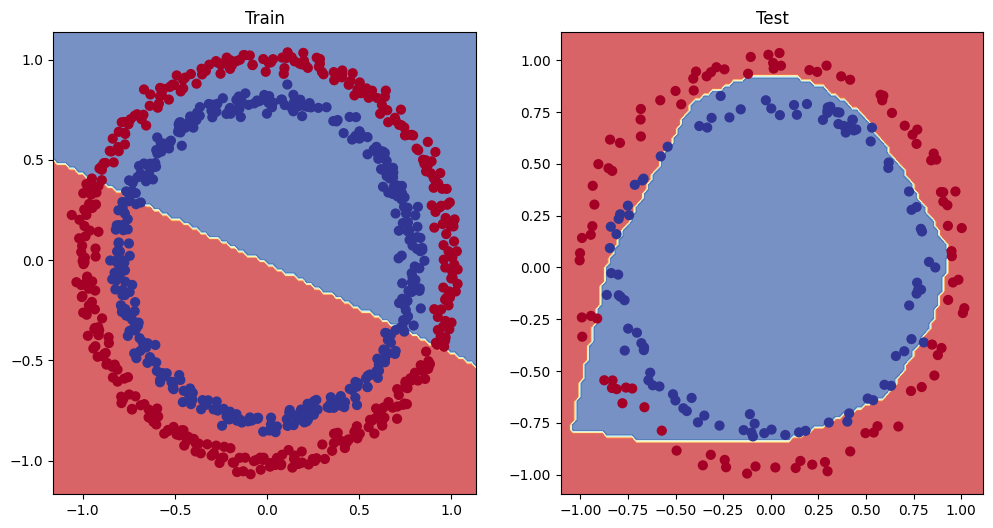

In [40]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test)

In [41]:
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

In [42]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

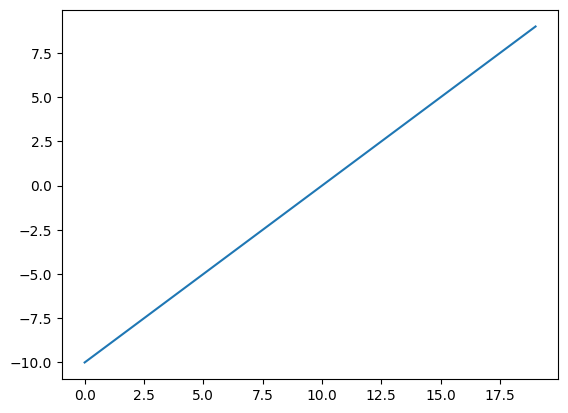

In [43]:
plt.plot(A)

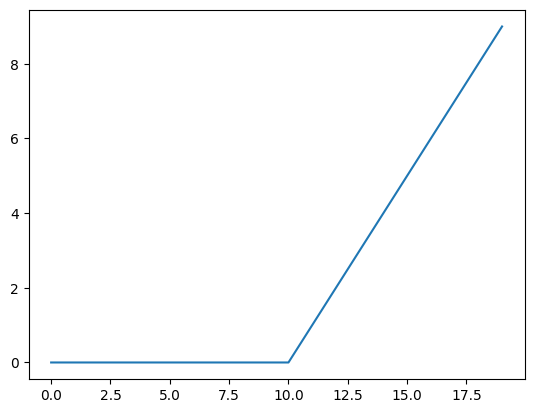

In [44]:
plt.plot(torch.relu(A))

In [45]:
def relu(X):
    return torch.maximum(torch.tensor(0), X)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

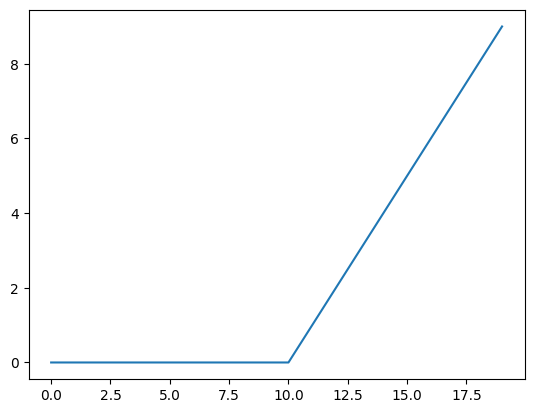

In [46]:
plt.plot(relu(A))

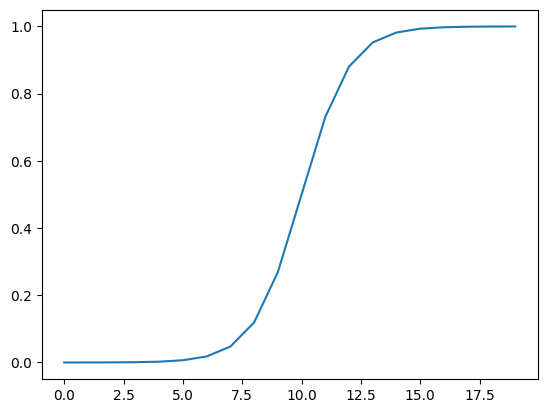

In [47]:
plt.plot(torch.sigmoid(A))